# Assignment 7

57584800 WANG Guanzhang 23/03/2023

## 1. Use the Breast Cancer Wisconsin (Diagnostic) dataset to select the best decision tree structure that has the minimum testing error.

Minimal cost complexity pruning recursively finds the node with the “weakest link”. The weakest link is characterized by an effective alpha, where the nodes with the smallest effective alpha are pruned first. 

Get ready

In [101]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np
%matplotlib inline

Initialization

In [6]:
X,y = load_breast_cancer(return_X_y=True)
#randomly split the dataset. By default, the test_size=0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)  

scikit-learn provides `DecisionTreeClassifier.cost_complexity_pruning_path` that returns the **effective alphas** and **the corresponding total leaf impurities** at each step of the pruning process. 

As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves.

In the following plot, the maximum effective alpha value is removed, because it is the trivial tree with only one node.

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

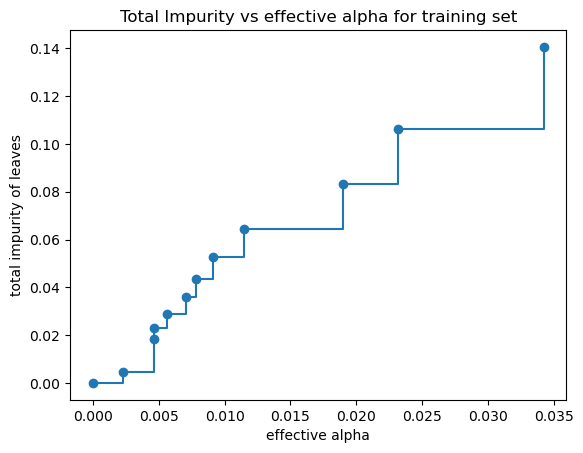

In [7]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train) #seeking alpha
ccp_alphas, impurities = path.ccp_alphas, path.impurities #output apha and tree impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post") #give up the maximum effective alpha
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

Next, we train a decision tree using the effective alphas. The last value in `ccp_alphas` is the alpha value that **prunes the whole tree**, leaving the tree `clfs[-1]` with one node.

In [8]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.3272984419327777



The code given below presented the relationship between the mdoel complexity and penalty alpha

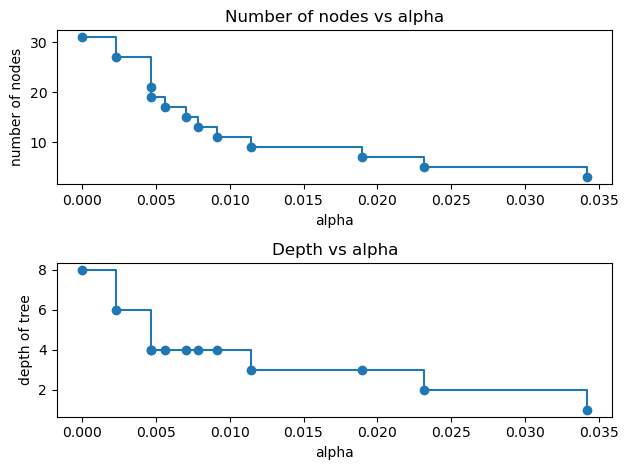

In [9]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

When ccp_alpha is set to zero and keeping the other default parameters of DecisionTreeClassifier, the tree overfits, leading to a 100% training accuracy and 88% testing accuracy. As alpha increases, more of the tree is pruned, thus creating a decision tree that generalizes better.

In this assignment, when alpha equals to  **0.015**, the minimum test error reached.

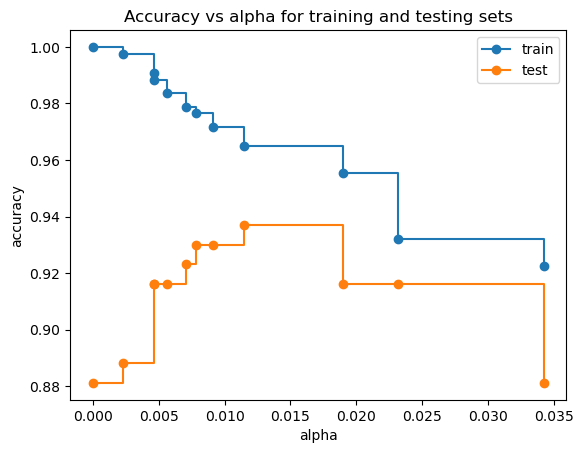

In [10]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

## 2. Does the Breast Cancer Wisconsin (Diagnostic) dataset has imbalanced issue? If so, select the best model according to your own evaluation metric and report the result


First of all, check a situation.

In [19]:
unique, counts = np.unique(y, return_counts=True)
print(unique)
print(counts)

[0 1]
[212 357]


It seems that it has a little bit imbalanced

In this assignment, I use confusion matrix as the metric

We have learned that when the alpha equals to 0.015, the decision tree gains the minimum test error, therefore, we try to check the confusion matrix to see if this model is the best for this imbalanced dataset.

------------------report--------------------
0.0022664723976040134
              precision    recall  f1-score   support

   Malignant       0.79      0.94      0.86        53
      Benign       0.96      0.86      0.91        90

    accuracy                           0.89       143
   macro avg       0.88      0.90      0.88       143
weighted avg       0.90      0.89      0.89       143

--------------------------------------------
------------------report--------------------
0.004647426339100881
              precision    recall  f1-score   support

   Malignant       0.85      0.94      0.89        53
      Benign       0.96      0.90      0.93        90

    accuracy                           0.92       143
   macro avg       0.91      0.92      0.91       143
weighted avg       0.92      0.92      0.92       143

--------------------------------------------
------------------report--------------------
0.004659799593581376
              precision    recall  f1-score   support

  

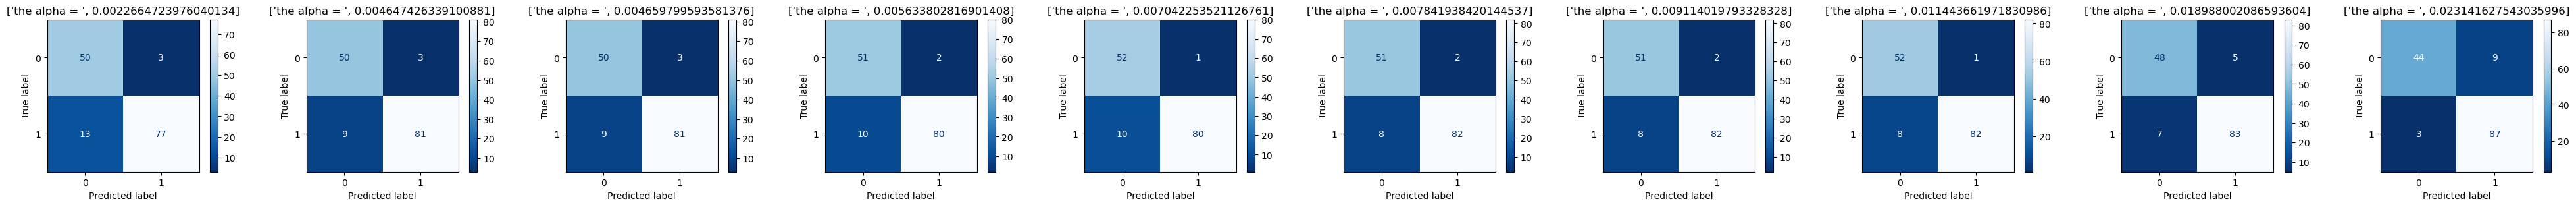

In [93]:
ccp_alphas_selected = ccp_alphas[1:11] #selected useful ccp_alphas
ccp_alphas_selected
fig, axs = plt.subplots( ncols = ccp_alphas_selected.size ,figsize = (50,3))
x = 0

for ccp_alpha in ccp_alphas_selected:
 
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest= clf.predict(X_test)
    print("------------------report--------------------")
    print(ccp_alpha)
    print(classification_report(y_test, Y_predTest, target_names=['Malignant','Benign']))
    print("--------------------------------------------")
    ConfusionMatrixDisplay.from_predictions(y_test, Y_predTest, labels=clf.classes_, cmap= plt.cm.Blues_r, ax=axs[x])
    axs[x].set_title(["the alpha = ",ccp_alpha])
    x = x + 1




## Evaluation
Given that this is relevant with the cancer diagnostic, we care about the precision about the model. when alpha = 0.011443661971830986, the precision is the best among the model

## 3. Use 5-fold cross-validation to select the best tree structure for the Breast Cancer Wisconsin (Diagnostic) dataset.

In [100]:
for i in range(len(ccp_alphas_selected)):

    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alphas_selected[i])
    clf.fit(X_train, y_train)#use the i-th model in the "classifiers" list
    scores = np.mean(cross_val_score(clf, X, y, cv=5))
    print('CV Score of '+ str(ccp_alphas_selected[i])+":", scores)

CV Score of 0.0022664723976040134: 0.9191274646793974
CV Score of 0.004647426339100881: 0.9208818506443098
CV Score of 0.004659799593581376: 0.9208818506443098
CV Score of 0.005633802816901408: 0.9208818506443098
CV Score of 0.007042253521126761: 0.9226362366092221
CV Score of 0.007841938420144537: 0.9226362366092221
CV Score of 0.009114019793328328: 0.9314392175128084
CV Score of 0.011443661971830986: 0.9279149200434714
CV Score of 0.018988002086593604: 0.9297158826269213
CV Score of 0.023141627543035996: 0.9297158826269213


When the alpha is 0.009114019793328328, the best structure made.

## 4. Use the same dataset, compare the performance of the best tree structure and the Random Forest method. Which model do you prefer?

------------------------Decision Tree--------------- ---------------
              precision    recall  f1-score   support

   Malignant       0.86      0.96      0.91        53
      Benign       0.98      0.91      0.94        90

    accuracy                           0.93       143
   macro avg       0.92      0.94      0.93       143
weighted avg       0.93      0.93      0.93       143

------------------------Random Forest-------------------------------
              precision    recall  f1-score   support

   Malignant       0.91      0.94      0.93        53
      Benign       0.97      0.94      0.96        90

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



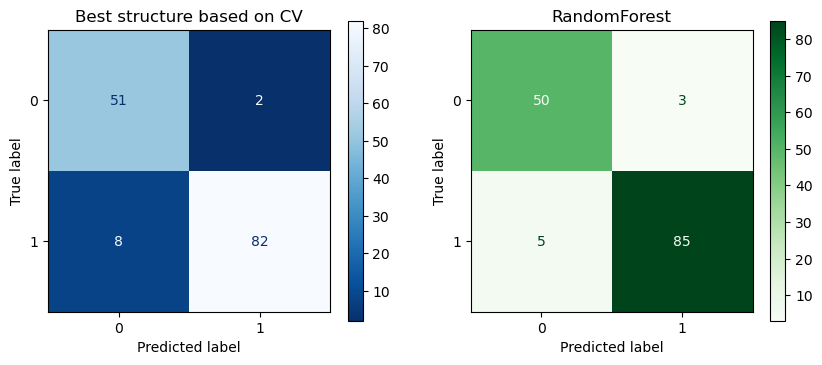

In [102]:
X,y = load_breast_cancer(return_X_y=True)
#randomly split the dataset. By default, the test_size=0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)  

clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.009114019793328328)
clf = clf.fit(X_train, y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest= clf.predict(X_test)

np.random.seed(1) #because the model has random sampling, a random seed can ensure repeated results.
clf1 = RandomForestClassifier(random_state=0, n_estimators=5)
clf1 = clf1.fit(X_train, y_train)
Y_predTrain1 = clf1.predict(X_train)
Y_predTest1 = clf1.predict(X_test)

fig, axs = plt.subplots(ncols=2, figsize=(10, 3.9))

ConfusionMatrixDisplay.from_predictions(y_test, Y_predTest, labels=clf.classes_, cmap= plt.cm.Blues_r, ax=axs[0])
rfm = ConfusionMatrixDisplay.from_predictions(y_test, Y_predTest1, labels=clf1.classes_, cmap= plt.cm.Greens, ax=axs[1])
axs[0].set_title("Best structure based on CV")
axs[1].set_title("RandomForest")

print("------------------------Decision Tree--------------- ---------------")
print(classification_report(y_test, Y_predTest, target_names=['Malignant','Benign']))
print("------------------------Random Forest-------------------------------")
print(classification_report(y_test, Y_predTest1, target_names=['Malignant','Benign']))


Personally, I perfer the RandomForest because it has higher precision.